In [1]:
import pandas as pd

In [3]:
df = pd.read_table('pathways/R-HSA-1059683.txt')
df 

,src_type,src,dest_type,dest,direction,type
0,ENTREZID,9021,ENTREZID,3717,directed,Control(Out: INHIBITION of BiochemicalReaction)
1,ENTREZID,9021,ENTREZID,3717,undirected,Binding
2,ENTREZID,9021,ENTREZID,3569,directed,Control(Out: INHIBITION of BiochemicalReaction)
3,ENTREZID,9021,ENTREZID,3569,undirected,Binding
4,ENTREZID,9021,ENTREZID,3570,directed,Control(Out: INHIBITION of BiochemicalReaction)
...,...,...,...,...,...,...
72,ENTREZID,5781,ENTREZID,3569,undirected,Binding
73,ENTREZID,5781,ENTREZID,3570,undirected,Binding
74,ENTREZID,5781,ENTREZID,867,undirected,Binding
75,ENTREZID,5781,ENTREZID,3716,undirected,Binding


In [4]:
df.loc[:, ['src', 'dest', 'direction', 'type']]

,src,dest,direction,type
0,9021,3717,directed,Control(Out: INHIBITION of BiochemicalReaction)
1,9021,3717,undirected,Binding
2,9021,3569,directed,Control(Out: INHIBITION of BiochemicalReaction)
3,9021,3569,undirected,Binding
4,9021,3570,directed,Control(Out: INHIBITION of BiochemicalReaction)
...,...,...,...,...
72,5781,3569,undirected,Binding
73,5781,3570,undirected,Binding
74,5781,867,undirected,Binding
75,5781,3716,undirected,Binding


change to :

src | dest | src_index | dest_index | src_fpkm | dest_fpkm | direction | type | pathway_name




In [3]:
import torch_geometric as pyg

In [5]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[3, 1, 1, 2],
                           [1, 6, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

data.x, data.edge_index

(tensor([[-1.],
         [ 0.],
         [ 1.]]),
 tensor([[3, 1, 1, 2],
         [1, 6, 2, 1]]))

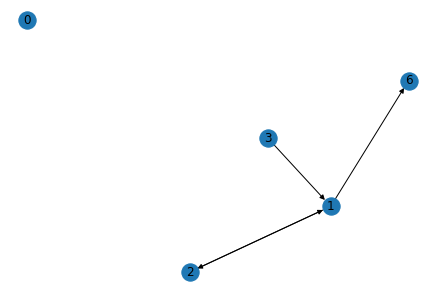

In [15]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
import matplotlib.pyplot as plt

def draw(Data):
    G = to_networkx(Data)
    nx.draw(G, with_labels=True)
    plt.show()

draw(data)

In [16]:
from torch_geometric.utils import subgraph

In [40]:
pw = torch.nn.ModuleList()
a = torch.nn.Linear(1,1)
for i in range(5):
    pw.append(a)
pw

ModuleList(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Linear(in_features=1, out_features=1, bias=True)
  (4): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
pw[1].parameters

<bound method Module.parameters of Linear(in_features=1, out_features=1, bias=True)>

In [41]:
list(pw.parameters())

[Parameter containing:
 tensor([[-0.2370]], requires_grad=True),
 Parameter containing:
 tensor([-0.0187], requires_grad=True)]

In [42]:
id(pw[0]) == id(pw[1])

True

In [36]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
    def forward(self,x):
        for i in range(855):
            x = torch.nn.Linear(1,1)(x)
        return x
    
m = Model()
# get_parameter_number(m)

m

Model()

In [26]:
def get_parameter_number(model):
    total_num = sum(p.numel() for p in model.parameters())
    trainable_num = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return {'Total': total_num, 'Trainable': trainable_num}

get_parameter_number(pw)

{'Total': 1710, 'Trainable': 1710}